Machine Learning for Everybody https://www.youtube.com/watch?v=i_LwzRVP7bg&t=1857s
telescope 
data from https://archive.ics.uci.edu/ml/datasets/magic+gamma+telescope

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# import StandardScaler from sklean.preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler  # import RandomOverSampler

In [2]:
col_names = [
    "fLength",
    "fWidth",
    "fSize",
    "fConc",
    "fConc1",
    "fAsym",
    "fM3Long",
    "fM3Trans",
    "fAlpha",
    "fDist",
    "class",
]
df = pd.read_csv("data/magic04.data", header=None, names=col_names)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == "g").astype(int)
# df['class'].unique()
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


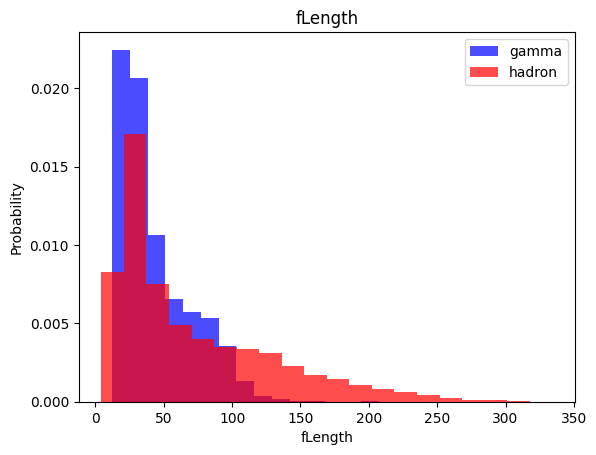

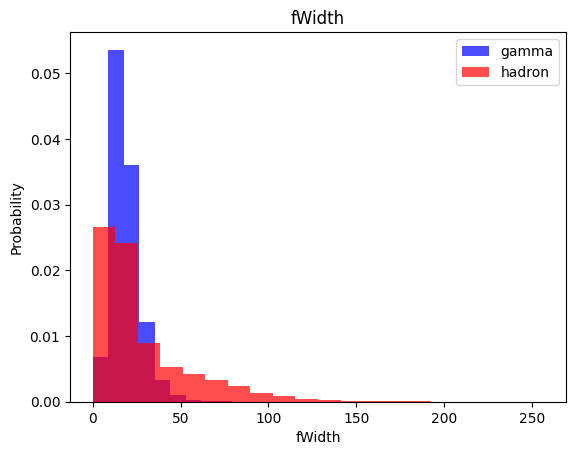

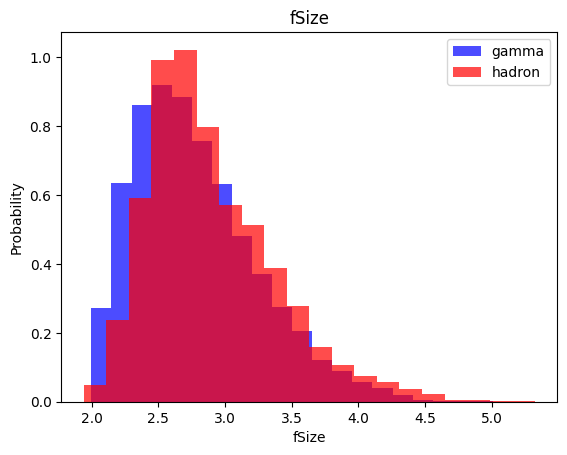

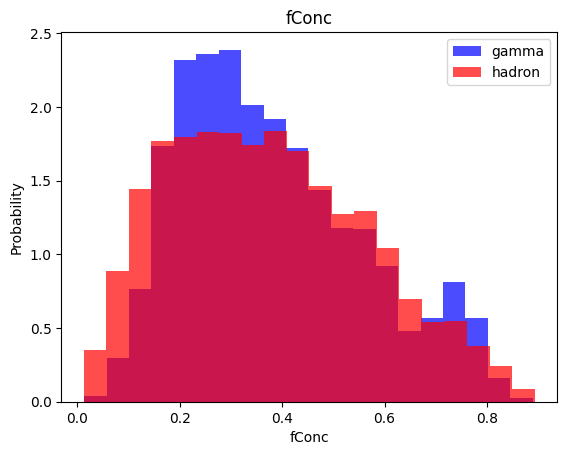

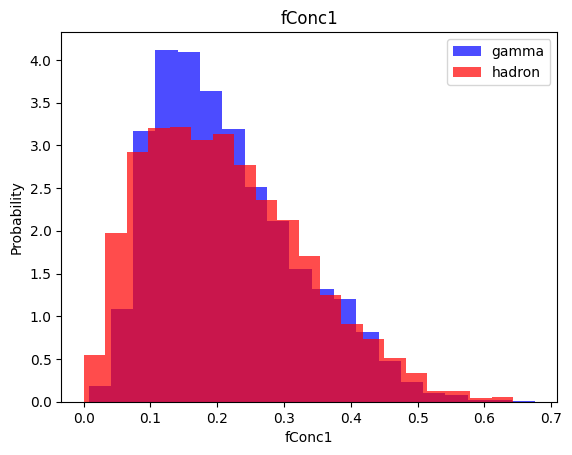

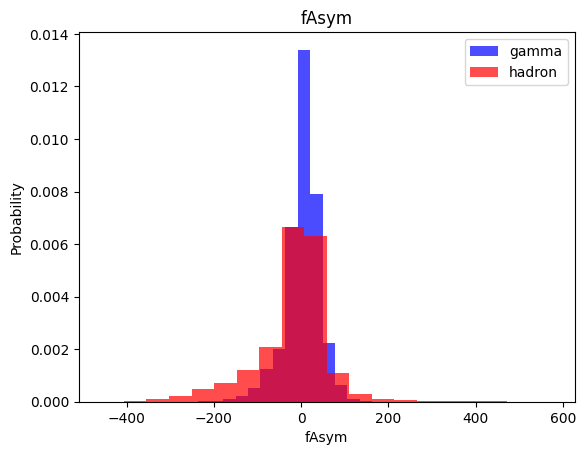

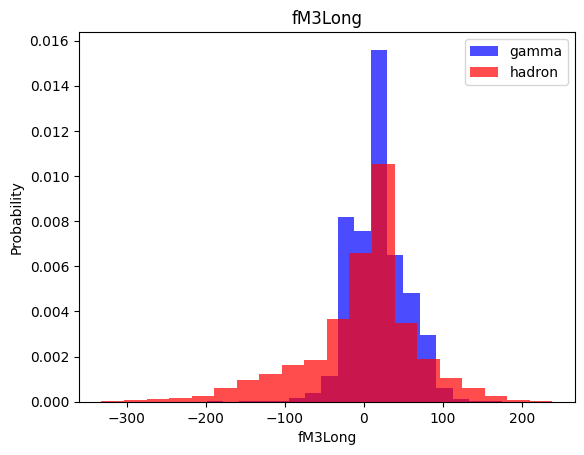

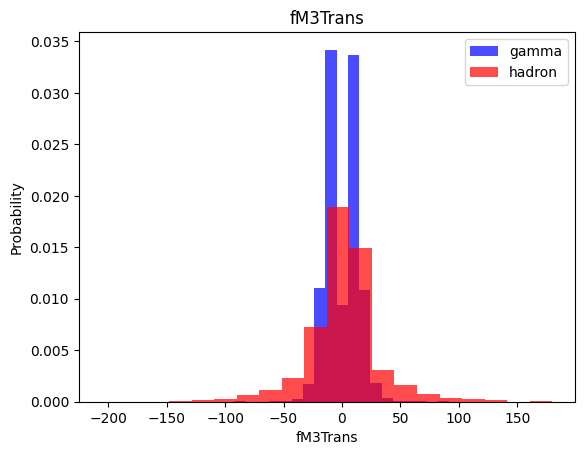

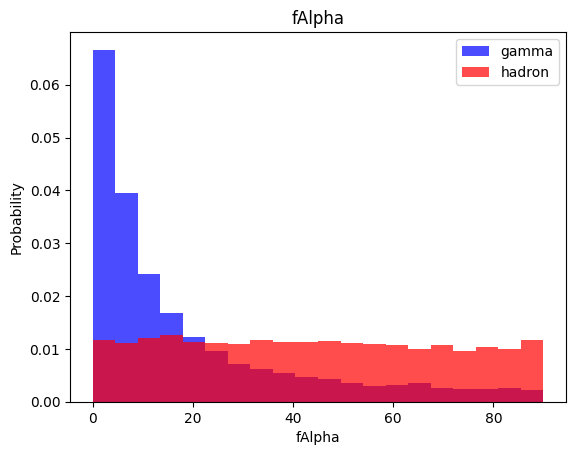

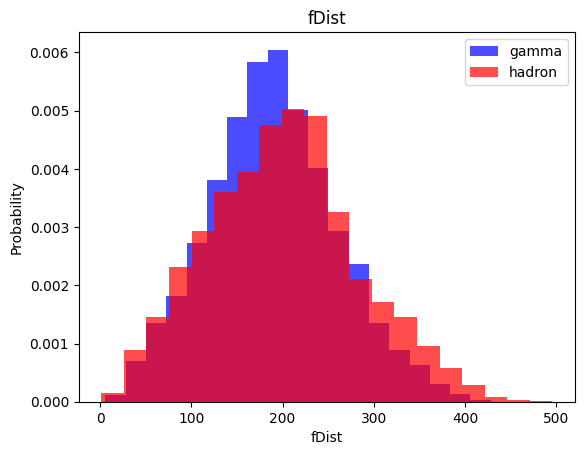

In [5]:
for col_name in col_names[:-1]:
    plt.hist(
        df[df["class"] == 1][col_name],
        bins=20,
        alpha=0.7,
        label="gamma",
        color="blue",
        density=True,
    )
    plt.hist(
        df[df["class"] == 0][col_name],
        bins=20,
        alpha=0.7,
        label="hadron",
        color="red",
        density=True,
    )
    plt.title(col_name)
    plt.legend()
    plt.ylabel("Probability")
    plt.xlabel(col_name)
    plt.show()

In [13]:
def scale_dataset1(dataframe):
    """generated by copilot"""
    for col_name in col_names[:-1]:
        dataframe[col_name] = (
            dataframe[col_name] - dataframe[col_name].mean()
        ) / dataframe[col_name].std()
    return dataframe

In [12]:
def scale_dateset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler(random_state=0)
        X, y = ros.fit_resample(X, y)

    data = np.hstack((X, y.reshape(-1, 1)))
    return data, X, y

In [9]:
test_y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
test_y2 = test_y.reshape(-1, 1)
test_y, test_y.shape, test_y2, test_y2.shape

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 (10,),
 array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 (10, 1))

In [10]:
train, valid, test = np.split(
    df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))]
)

In [14]:
train, X_train, y_train = scale_dateset(train, oversample=True)
valid, X_valid, y_valid = scale_dateset(valid, oversample=False)
test, X_test, y_test = scale_dateset(test, oversample=False)

# KNN
k nearest neighbours

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [18]:
y_test

array([1, 1, 1, ..., 1, 1, 1])

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1315
           1       0.86      0.85      0.85      2489

    accuracy                           0.81      3804
   macro avg       0.79      0.80      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_pred = nb_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1315
           1       0.74      0.89      0.81      2489

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.72      0.70      3804

